In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul # 이건 내가 만든 것
%matplotlib inline

Hangul OK in your Windows!


In [99]:
import tensorflow as tf
import os
import PIL
import shutil

In [129]:
# 기본 경로
base_dir = './OX_images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

./OX_images/train\O ./OX_images/train\X
./OX_images/validation\O ./OX_images/validation\X
./OX_images/test\O ./OX_images/test\X


In [130]:
# 훈련용 이미지 파일 이름 조회
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)
# os.listdir(): 경로 내에 있는 파일의 이름을 리스트의 형태로 반환

['O1.png', 'O10.png', 'O11.png', 'O12.png', 'o13.png', 'o17.png', 'o18.png', 'o19.png', 'O2.png', 'o20.png', 'o21.png', 'o22.png', 'o23.png', 'o24.png', 'o25.png', 'o26.png', 'o27.png', 'O3.png', 'o30.png', 'o31.png', 'o32.png', 'O4.png', 'O5.png', 'O6.png', 'O7.png', 'O8.png', 'O9.png', 'O_1.jpg', 'O_10.jpg', 'O_11.jpg', 'O_2.jpg', 'O_3.jpg', 'O_4.jpg', 'O_5.jpg', 'O_6.jpg', 'O_7.jpg', 'O_8.jpg', 'O_9.jpg']
['X1.png', 'X10.png', 'X11.png', 'X12.png', 'X2.png', 'x20.png', 'x21.png', 'x22.png', 'x23.png', 'x24.png', 'x25.png', 'x26.png', 'x28.png', 'x29.png', 'X3.png', 'x30.png', 'x31.png', 'x32.png', 'x33.png', 'x34.png', 'x36.png', 'X4.png', 'X5.png', 'X6.png', 'X7.png', 'X8.png', 'X9.png', 'X_10.jpg', 'X_11.jpg', 'X_12.jpg', 'X_13.jpg', 'X_14.jpg', 'X_3.jpg', 'X_4.jpg', 'X_5.jpg', 'X_6.jpg', 'X_7.jpg', 'X_9.jpg']


In [131]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 38
Total training x images : 38
Total validation o images : 8
Total validation x images : 8
Total test o images : 6
Total test x images : 6


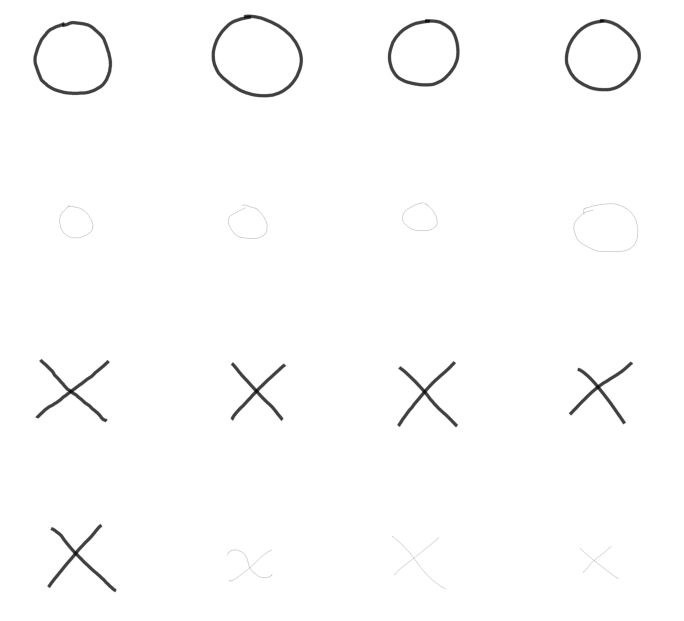

In [106]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

```
Augmentation이라는 것은, 기존의 데이터의 정보량을 보존한 상태로 노이즈를 주는 방식이다.
이는 다시 말하면, 내가 가지고 있는 정보량은 변하지 않는다는 것이다.
단지 정보량에 약간의 변화를 주는 것으로, 딥러닝으로 분석된 데이터의 강력하게 표현되는 고유의 특징을 느슨하게 만들어는 것이다. 
이는 결과적으로 오버피팅을 막아줄 수 있고, 예측 범위를 약간 넓혀줄 수 있다.
```

In [148]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.1범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.1범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='binary', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 76 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


- ImageDataGenerator가 각 분류 데이터를 읽어올 때, 폴더별로 category를 인식합니다.

In [149]:
# label의 클래스들을 확인
train_generator.class_indices

{'O': 0, 'X': 1}

In [143]:
next(train_generator)[0].shape # batch size 값으로 16을 줬기에; 마지막 1은 채널을 의미하며 graysacle(흑백)이기 때문

(16, 150, 150, 1)

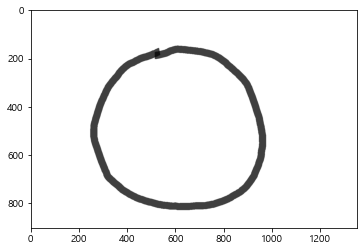

In [69]:
# next_o_pix, next_x_pix 이미지 경로에서 하나 불러오기
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

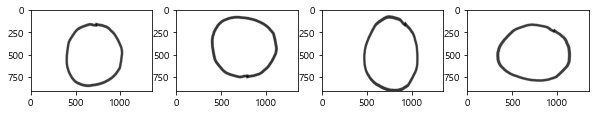

In [11]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [150]:
# 합성곱 신경망 모델 구성하기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인
# 출력층의 활성화함수로 ‘sigmoid’를 사용;
# 이는 0과 1 두 가지로 분류되는 ‘binary’ 분류 문제에 적합하기 때문

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 17, 17, 32)     

In [151]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [14]:
# 모델 훈련
# train_generator를 사용하여 모델을 훈련할 때는 model.fit() 대신 **model.fit_generator()**를 사용
history = model.fit(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

Epoch 1/100
4/4 - 4s - loss: 0.9332 - accuracy: 0.6167 - val_loss: 0.8444 - val_accuracy: 0.5000 - 4s/epoch - 913ms/step
Epoch 2/100
4/4 - 2s - loss: 0.8139 - accuracy: 0.6333 - val_loss: 0.4759 - val_accuracy: 0.7500 - 2s/epoch - 535ms/step
Epoch 3/100
4/4 - 2s - loss: 0.4546 - accuracy: 0.7000 - val_loss: 0.3718 - val_accuracy: 0.8125 - 2s/epoch - 514ms/step
Epoch 4/100
4/4 - 2s - loss: 0.2758 - accuracy: 0.8281 - val_loss: 0.2941 - val_accuracy: 0.8125 - 2s/epoch - 549ms/step
Epoch 5/100
4/4 - 2s - loss: 0.2699 - accuracy: 0.8500 - val_loss: 0.3538 - val_accuracy: 0.8125 - 2s/epoch - 510ms/step
Epoch 6/100
4/4 - 2s - loss: 0.3329 - accuracy: 0.7833 - val_loss: 0.4643 - val_accuracy: 0.7500 - 2s/epoch - 514ms/step
Epoch 7/100
4/4 - 2s - loss: 0.2331 - accuracy: 0.8667 - val_loss: 0.4814 - val_accuracy: 0.8125 - 2s/epoch - 523ms/step
Epoch 8/100
4/4 - 2s - loss: 0.2400 - accuracy: 0.8333 - val_loss: 0.2768 - val_accuracy: 0.8125 - 2s/epoch - 567ms/step
Epoch 9/100
4/4 - 2s - loss: 0.2

In [15]:
# 모델 성능 평가
model.evaluate(train_generator)

5/5 [==============================] - 2s 167ms/step - loss: 0.0511 - accuracy: 0.9868


[0.05108148232102394, 0.9868420958518982]

In [16]:
model.evaluate(validation_generator)

4/4 [==============================] - 1s 38ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014558976981788874, 1.0]

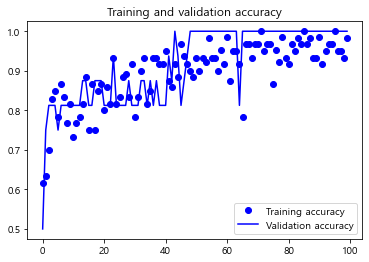

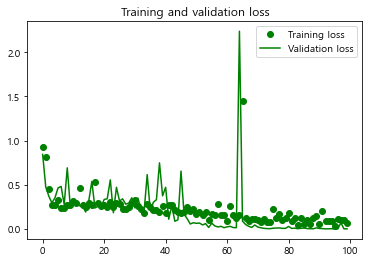

In [17]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Training accuracy와 validation accuracy 모두 epoch이 증가하면서 비슷하게 증가한다 (과적합 되지는 않은 것 같다)

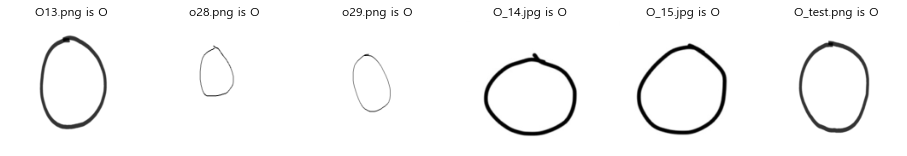

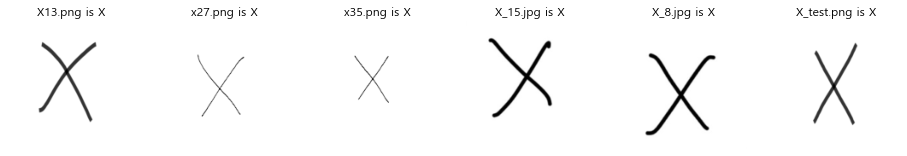

In [112]:
# 이제 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

# 테스트용 O 이미지 경로 설정
test_dir = './OX_images/test/'
test_o_dir = os.path.join(test_dir, 'O/')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_dir = './OX_images/test/'
test_x_dir = os.path.join(test_dir, 'X/')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 1, 6
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')        
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        
        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')

        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [113]:
# 모델 성능 평가
model.evaluate(test_generator)

3/3 [==============================] - 0s 35ms/step - loss: 2.6951e-04 - accuracy: 1.0000


[0.0002695129078347236, 1.0]

정확도 100%! 다 맞췄다.

In [159]:
# 모델 저장
model.save('ox_class_cnn.h5')

---